# Sprint10深層学習スクラッチニューラルネットワーク

In [1]:
#ライブラリのインポート
import numpy as np
from sklearn.model_selection import train_test_split

### データセットの用意
MNISTデータセットを使用します。以下のコードを実行すればKerasによりデータセットをダウンロードし、展開まで行えます。

**データセットをダウンロードするコード**

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


**MNISTとは？**

画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには学習用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかが含まれています。

**画像データとは？**

デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

### データセットの確認
まず、どういったデータなのかを見てみます。

**サンプルコード**

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

## 3.平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、平滑化（flatten）してあるという風に表現します。

**サンプルコード**

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

**補足**

ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

### 画像データの可視化
画像データを可視化します。plt.imshowに渡します。

**サンプルコード**

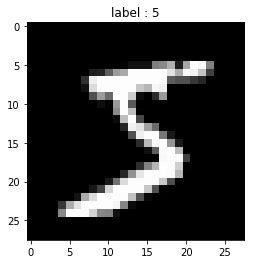

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

[numpy.reshape — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html)

[matplotlib.pyplot.imshow — Matplotlib 3.0.2 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

**発展的話題**

画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

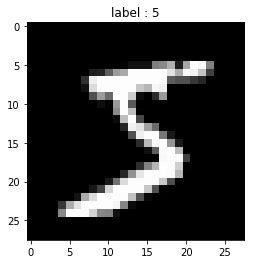

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
ndex = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

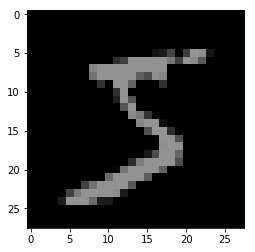

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

### 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。色は理想的には連続値であり、それを特徴量とするからです。以下のコードで変換可能です。

**サンプルコード**

In [8]:
#float型へ
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)

#正規化
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際にはone-hot表現に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

**サンプルコード**

In [9]:
#ワンホットエンコーディング
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


[sklearn.preprocessing.OneHotEncoder — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

さらに、学習用データ6万枚の内2割を検証用データとして分割してください。学習用データが48000枚、検証用データが12000枚となります。

**サンプルコード**

In [10]:
#データ分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [11]:
#ワンホットエンコーディング
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


## 【問題1】ニューラルネットワーク分類器のクラスを作成
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetrowkClassifierを作成してください。

### ＜単体テスト＞

### フォワードプロパゲーション
三層のニューラルネットワークのフォワードプロパゲーションを作成します。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。



### 活性化関数（フォワードプロバゲーション）
活性化関数を作成し、フォワードプロパゲーションの中で使用します。切り替えられるように実装することを推奨しますが、片方でも構いません。

「シグモイド関数」

$$
    f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)}
$$

指数関数 $exp(-A)$ の計算はnp.expを使用してください。

numpy.exp — NumPy v1.15 Manual

「ハイパボリックタンジェント関数」

次の数式で表されますが、np.tanhひとつで実現できます。

$$
    f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)}
$$

numpy.tanh — NumPy v1.15 Manual

＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的です。次のSprintで扱います。

In [12]:
#シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

In [13]:
# ハイパポリックタンジェント関数
def tanh(x):
    return np.tanh(x)

### ソフトマックス関数
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。

次の数式です。

$$
    Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n}exp(A_{3\_i})}
$$

$Z_{3k}$ : $k$番目のクラスの確率ベクトル (batch_size,)

$A_{3k}$ : $k$番目のクラスにあたる前の層からのベクトル (batch_size,)

$n$ : クラスの数、n_output。今回のMNISTでは10。

分母は全てのクラスに相当する値を指数関数に通した上で足し合わせたものです。その中で、分子に $k$ 番目のクラスを持ってくることで、 $k$
 番目のクラスである確率が求まります。

これを10クラス分計算し、合わせたものが 
$Z_3$
 です。

In [14]:
 #ソフトマックス関数
def softmax(x):
    #オーバーフロー対策
    max_x = np.max(x)
    
    #最大要素を引いてからexpをかけることでオーバーフローを回避
    exp_x = np.exp(x - max_x)
    
     #話を計算
    sum_exp_x = np.sum(exp_x, axis=1).reshape(-1, 1)
    
    return exp_x / sum_exp_x

「1層目」
$$
    A_1 = X \cdot W_1 + B_1
$$

$X$ : 特徴量ベクトル (batch_size, n_features)

$W_1$ : 1層目の重み (n_features, n_nodes1)

$B_1$ : 1層目のバイアス (n_nodes1,)

$A_1$ : 出力 (batch_size, n_nodes1)

In [15]:
# 1層目データセット用意
X = np.array([[1, 2], [3, 4]])
W1 = np.array([[0.02, 0.04], [0.05, 0.08]])
B1 = 0.01

In [16]:
#  １層目計算
A1 = X @ W1 + B1
print(A1)

[[0.13 0.21]
 [0.27 0.45]]


「1層目の活性化関数」

$$
    Z_1 = f(A_1)
$$

$f()$ : 活性化関数

$Z_1$　出力 (batch_size, n_nodes1)

In [17]:
#１層目の活性化関数(sigmoid)の計算
Z1s = sigmoid(A1)
print('sigmoid\n{}'.format(Z1s))
print()

#１層目の活性化関数(tanh)の計算
Z1h = tanh(A1)
print('tanh\n{}'.format(Z1h))


sigmoid
[[0.53245431 0.55230791]
 [0.5670929  0.61063923]]

tanh
[[0.12927258 0.2069665 ]
 [0.26362484 0.42189901]]


「2層目」

$$
    A_2 = Z_1 \cdot W_2 + B_2
$$

$W_2$ : 2層目の重み (n_nodes2, n_nodes2)

$B_2$ : 2層目のバイアス (n_nodes2,)

$A_2$ : 出力 (batch_size, n_nodes2)

In [18]:
# 2層目データセット用意
W2 = np.array([[0.1, 0.2], [0.2, 0.1]])
B2 = 0.01

In [19]:
#2層目の計算(sigmoid)
A2s = Z1s @ W2 + B2
print('sigmoid\n{}'.format(A2s))
print()

#2層目の計算(tanh)
A2h = Z1h @ W2 + B2
print('tanh\n{}'.format(A2h))


sigmoid
[[0.17370701 0.17172165]
 [0.18883714 0.1844825 ]]

tanh
[[0.06432056 0.05655117]
 [0.12074228 0.10491487]]


「2層目の活性化関数」

$$
    Z_2 = f(A_2)
$$

$f()$ : 活性化関数

$Z_2$　出力 (batch_size, n_nodes2)

In [20]:
#2層目の活性化関数(sigmoid)の計算
Z2s = sigmoid(A2s)
print('sigmoid\n{}'.format(Z2s))
print()

#2層目の活性化関数(tanh)の計算
Z2h = tanh(A2h)
print('tanh\n{}'.format(Z2h))


sigmoid
[[0.54331788 0.54282523]
 [0.54706949 0.54599026]]

tanh
[[0.064232   0.05649096]
 [0.12015893 0.10453162]]


「3層目(出力層)」

$$
    A_3 = Z_2 \cdot W_3 + B_3
$$

$W_3$ : 2層目の重み (n_nodes2, n_output)

$B_3$ : 2層目のバイアス (n_output,)

$A_3$ : 出力 (batch_size, n_output)

In [21]:
# 3層目データセット用意
W3 = np.array([[0.3, 0.4], [0.1, 0.4]])
B3 = 0.01

In [22]:
#3層目の計算(sigmoid)
A3s = Z2s @ W3 + B3
print('sigmoid\n{}'.format(A3s))
print()

#3層目の計算(tanh)
A3h = Z2h @ W3 + B3
print('tanh\n{}'.format(A3h))

sigmoid
[[0.22727789 0.44445724]
 [0.22871987 0.4472239 ]]

tanh
[[0.0349187  0.05828919]
 [0.05650084 0.09987622]]


「3層目の活性化関数」

$$
    Z_3 = softmax(A_3)
$$

$softmax()$ : ソフトマックス関数

$Z_3$　出力 (batch_size, n_output)

$Z_3$は各ラベル(0〜9)に対する確率の配列である。

In [23]:
#3層目の活性化関数(sigmoid)の計算
Z3s = softmax(A3s)
print('sigmoid\n{}'.format(Z3s))
print()

#2層目の活性化関数(tanh)の計算
Z3h = softmax(A3h)
print('tanh\n{}'.format(Z3h))


sigmoid
[[0.44591757 0.55408243]
 [0.4455903  0.5544097 ]]

tanh
[[0.49415764 0.50584236]
 [0.48915786 0.51084214]]


### バックプロパゲーション
三層のニューラルネットワークのバックプロパゲーションを作成します。確率的勾配降下法を行う部分です。

数式を以下に示します。

まず、i層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W′_i$と $B′_i$は次の数式で求められます。

$$
W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i}) \\
B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i})
$$


「3層目」

$$
\frac{\partial L}{\partial A_3} = Z_3 - Y\\
\frac{\partial L}{\partial B_3} = \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial W_3} = Z_2^T \cdot \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T
$$


「2層目」

$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} × \{1-tanh^2(A_2)\}\\
\frac{\partial L}{\partial B_2} = \frac{\partial L}{\partial A_2}
\\
\frac{\partial L}{\partial W_2} = Z_1^T \cdot \frac{\partial L}{\partial A_2}
\\
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T
$$


「1層目」

$$
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} × \{1-tanh^2(A_1)\}
\\
\frac{\partial L}{\partial B_1} = \frac{\partial L}{\partial A_1}
\\
\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}
$$

### ハイパボリックタンジェント

In [24]:
# loss データセット用意

da3h = np.array([[0.1, 0.6], [0.7, 0.3]])
da3h

array([[0.1, 0.6],
       [0.7, 0.3]])

In [25]:
#３層目
db3h = da3h

dw3h = Z2h.T @ da3h

dz2h = da3h @ W3.T

#２層目
da2h = dz2h * (1 - (tanh(A2h) ** 2))

db2h = da2h

dw2h = Z1h.T @ da2h

dz1h = da2h @ W2.T

#1層目
da1h = dz1h * (1 - (tanh(A1) ** 2))

db1h = da1h

dw1h = X.T @ da1h

In [26]:
da1h

array([[0.07544679, 0.07532641],
       [0.06523593, 0.06891615]])

In [27]:
dw1h

array([[0.27115458, 0.28207486],
       [0.4118373 , 0.42631742]])

### sigmoid

In [28]:
# loss データセット用意

da3s = np.array([[0.1, 0.6], [0.7, 0.3]])
da3s

array([[0.1, 0.6],
       [0.7, 0.3]])

In [29]:
# ３層目
db3s = da3s

dw3s = Z2s.T @ da3s

dz2s = da3s @ W3.T


 #２層目
da2s = dz2s * ((1 - sigmoid(A2s)) * sigmoid(A2s))

db2s = da2s

dw2s = Z1s.T @ da2s

dz1s = da2s @ W2.T


#1層目
da1s = dz1s * ((1 - sigmoid(A1)) * sigmoid(A1))

db1s = da1s

dw1s = X.T @ da1s

In [30]:
da1s

array([[0.00475678, 0.00484707],
       [0.00431992, 0.00500806]])

In [31]:
dw1s

array([[0.01771654, 0.01987124],
       [0.02679324, 0.02972637]])

### ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する確率的勾配降下法が一般的です。分割した際のひとかたまりをミニバッチ、そのサンプル数をバッチサイズと呼びます。

今回はバッチサイズを10とします。今回使う学習用データは48000枚ですから、4800回の更新を繰り返すことになります。ニューラルネットワークではこれを4800回イテレーション（iteration）すると呼びます。学習データを一度全て見ると1回のエポック（epoch）が終わったことになります。このエポックを複数回繰り返し、学習が完了します。

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

**コード**

In [32]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

### クラスにまとめる

In [33]:
#ライブラリインポート
import numpy as np
from sklearn.preprocessing import OneHotEncoder

class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------
    verbose : bool
        学習過程を出力する場合はTrue
    n_hidden : int
        隠れ層のノード数
    l2 : float
        正則化係数
    epochs : int
        エポック数（イテレーション数）
    eta : float
        学習率
    minibatch_size : int
        ミニバッチサイズ

    Attributes
    ----------
    self.b_h : ndarray,shape(n_hidden, )
        隠れ層のバイアス
    self.w_h : ndarray,shape(n_features, n_hidden)
        隠れ層の重み
    self.b_out : ndarray,shape(n_output, )
        出力層のバイアス
    self.w_out : ndarray,shape(n_hidden, n_output)
        出力層の重み
    self.evals_ : dict
        イテレーションごとのcostとaccuracy
    """

    def __init__(self, verbose = True, n_hidden1=100, n_hidden2=30, epochs=100, eta=0.001, minibatch_size=10, seed=None):
        self.verbose = verbose                                        #True(default):学習過程を表示、False:非表示
        self.random=np.random.RandomState(seed)  #初期化する
        self.n_hidden1 = n_hidden1                                   #1層目のノード数(default:100)
        self.n_hidden2 = n_hidden2                                   #2層目のノード数(default:30)
        self.epochs = epochs                                          #エポック数(default:100)
        self.eta = eta                                                       #学習率(default:0.001)
        self.minibatch_size = minibatch_size              #ミニバッチを行うサイズ(default:10)
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #クラスラベルの個数
        n_output = np.unique(y).shape[0]
        
        #入力層の特徴量
        n_features = X.shape[1]
                
        #1層目の重みを初期化
        self.b_1 = np.zeros(self.n_hidden1)
        self.w_1 = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden1))

        #2層目の重みを初期化
        self.b_2 = np.zeros(self.n_hidden2)
        self.w_2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden1, self.n_hidden2))

        #3層目(出力層)の重みを初期化
        self.b_3 = np.zeros(n_output)
        self.w_3 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden2, n_output))
        
        #学習過程データの格納用dictionary
        self.evals_ = {'cost' : [], 'cost_val' : [], 'train_acc' : [], 'valid_acc' : []}
        
        #正解データをワンホットエンコーディング
        y_enc = self._onehot(y)
        
        #エポック数だけトレーニングを繰り返す
        for i in range(self.epochs):
            
            #minibatchデータを生成
            get_mini_batch = GetMiniBatch(X, y_enc, batch_size=self.minibatch_size)
            
            #引数で設定したminibatch数の単位で学習を行う
            for mini_X_train, mini_y_train in get_mini_batch:
                                            
                #フォワードプロパゲーション
                #a:活性化関数に代入するもの、z:活性化関数の計算結果
                z_1, a_1, z_2, a_2, z_3, a_3 = self._forward(mini_X_train)
                
                #バックプロパゲーション                
                delta_w_1, delta_b_1, delta_w_2, delta_b_2, delta_w_3, delta_b_3 = self._back(
                    mini_X_train, mini_y_train, z_1, a_1, z_2, a_2, z_3, a_3)
                
                #１層目の重みの更新
                self.w_1 -= self.eta * delta_w_1
                self.b_1 -= self.eta * delta_b_1
                
                #2層目の重みの更新
                self.w_2 -= self.eta * delta_w_2
                self.b_2 -= self.eta * delta_b_2

                #3層目の重みの更新
                self.w_3 -= self.eta * delta_w_3
                self.b_3 -= self.eta * delta_b_3
                
                
            ############
            # 評価
            ############
            
            #イテレーションごとに評価を行う
            z_1, a_1, z_2, a_2, z_3, a_3 = self._forward(X)
            
            #交差エントロピー誤差を計算
            cost = self._compute_cost(y=y_enc, y_pred=z_3)

            #誤差を格納
            self.evals_['cost'].append(cost)
            
            #推定を行い、accuracyを計算する
            y_pred = self.predict(X)
            train_acc = \
                ((np.sum(y == y_pred)).astype(np.float) / X.shape[0])
            self.evals_['train_acc'].append(train_acc)
            
            #検証用データが引数にある場合、処理を行う
            if X_val is not None:
                
                #y_valのワンホットエンコーディング
                y_val_enc = self._onehot(y_val)
                
                #イテレーションごとに評価を行う
                z_1_val, a_1_val, z_2_val, a_2_val, z_3_val, a_3_val = self._forward(X_val)
                
                #検証用データの交差エントロピー誤差を計算
                cost_val = self._compute_cost(y=y_val_enc, y_pred=z_3_val)

                #誤差を格納
                self.evals_['cost_val'].append(cost_val)
                
                #推定を行い、accuracyを計算する
                y_val_pred = self.predict(X_val)
                valid_acc = \
                    ((np.sum(y_val == y_val_pred)).astype(np.float) / X_val.shape[0])
                self.evals_['valid_acc'].append(valid_acc)
            
            

            #verboseをTrueにした際は学習過程などを出力する
            if self.verbose:
                #一度だけ、'Cross Entropy Error'を出力
                if i == 0:
                    print('Cross Entropy Error')
                    
                #エポックごとのコスト関数を出力
                print('epoch{} : {}'.format(i+1, np.mean(cost)))
                
                #検証用データがある場合、そのコスト関数も出力
                if X_val is not None:
                    print('epoch_val{} : {}'.format(i+1, np.mean(cost_val)))

        return self


    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        y_pred :  次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        #フォワードプロパゲーション
        z_1, a_1, z_2, a_2, z_3, a_3 = self._forward(X)
        
        #出力層の確率から、最大値をそのクラスとする
        y_pred = np.argmax(z_3, axis=1)
        
        return y_pred
    
    def _onehot(self, y):
        """
        多クラス分類を行う際のone-hot表現に変換

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            サンプル

        Returns
        -------
        y_one_hot : 次の形のndarray, shape (n_samples, n_classes)
            推定結果
        """
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_one_hot = enc.fit_transform(y[:, np.newaxis])
        
        return y_one_hot
    
    
    def _sigmoid(self, z):
        """
        活性化関数sigmoidを計算する

        Parameters
        ----------
        z : 次の形のndarray, shape ((batch_size, n_nodes)
            サンプル

        Returns
        -------

        """
        
        return 1 / (1 + np.exp(-z))
    
    def _softmax(self, x):
        """
        ソフトマックスを計算する

        Parameters
        ----------
        x : 次の形のndarray, shape (batch_size, n_output)
            サンプル

        Returns
        -------
         次の形のndarray, shape (batch_size, n_output)
            ソフトマックス計算結果
        """
        #オーバーフロー対策
        max_x = np.max(x)

        #最大要素を引いてからexpをかけることでオーバーフローを回避
        exp_x = np.exp(x - max_x)

         #和を計算
        sum_exp_x = np.sum(exp_x, axis=1).reshape(-1, 1)

        return exp_x / sum_exp_x

    
    def _forward(self, X):
        """
        フォワードプロパゲーションの計算

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
         次の形のndarray, shape (batch_size, n_nodes)
            sigmoid計算結果
        """
        
        #1層目
        #[n_samples, n_features] dot [n_features, n_hidden1]
        #→ [n_samples, n_hiddne1]
        a_1 = (X @ self.w_1) + self.b_1
        
        #1層目の活性化関数
        z_1 = self._sigmoid(a_1)

        #2層目
        #[n_samples, n_features] dot [n_features, n_hidden1]
        #→ [n_samples, n_hiddne1]
        a_2 = (z_1 @ self.w_2) + self.b_2
        
        #2層目の活性化関数
        z_2 = self._sigmoid(a_2)

        #3層目(出力層)
        #[n_samples, n_hiddne] dot [n_hidden, n_classlabels]
        #→ [n_samples, n_classlabls]
        a_3 = (z_2 @ self.w_3) + self.b_3
        
        #3層目出力層の活性化関数
        z_3 = self._softmax(a_3)
        
        return z_1, a_1, z_2, a_2, z_3, a_3
    
    def _back(self, X, y, z_1, a_1, z_2, a_2, z_3, a_3):
        """
        バックプロパゲーションの計算

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
         次の形のndarray, shape (batch_size, n_nodes)
            sigmoid計算結果
        """
        #3層目
        #[n_samples, n_output]
        delta_a_3 = z_3 - y

        #[n_hidden, n_samples] dot [n_samples, n_output]
        #→ [n_hiddne, n_output]
        delta_w_3 = z_2.T @ delta_a_3

        #[n_output,]
        delta_b_3 = np.mean(delta_a_3, axis=0)

        #2層目
        #[n_samples, n_classlabels] dot [n_classlabels, n_hidden]
        #→ [n_samples, n_hidden]
        delta_a_2 = ((delta_a_3 @ self.w_3.T) * ((1 - self._sigmoid(a_2)) * self._sigmoid(a_2)))

        #[n_features, n_samples] dot [n_samples, n_hidden]
        #→ [n_features, n_hidden]
        delta_w_2 = z_1.T @ delta_a_2

        #[n_hidden, ]
        delta_b_2 = np.mean(delta_a_2, axis=0)

        #1層目
        #[n_samples, n_classlabels] dot [n_classlabels, n_hidden]
        #→ [n_samples, n_hidden]
        delta_a_1 = ((delta_a_2 @ self.w_2.T) * ((1 - self._sigmoid(a_1)) * self._sigmoid(a_1)))

        #[n_features, n_samples] dot [n_samples, n_hidden]
        #→ [n_features, n_hidden]
        delta_w_1 = X.T @ delta_a_1

        #[n_hidden, ]
        delta_b_1 = np.mean(delta_a_1, axis=0)
        
        return delta_w_1, delta_b_1, delta_w_2, delta_b_2, delta_w_3, delta_b_3

    
    
    #交差エントロピー誤差
    def _compute_cost(self, y, y_pred):

        return - np.sum(y * np.log(y_pred), axis=1)
    
    
    
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [34]:
snn = ScratchSimpleNeuralNetrowkClassifier(
    verbose = True, 
    n_hidden1=400, 
    n_hidden2=200, 
    epochs=30, 
    eta=1e-3, 
    minibatch_size=10, 
    seed=None)

snn.fit(X_train, y_train, X_val, y_val)

Cross Entropy Error
epoch1 : 0.5858536543394397
epoch_val1 : 0.5857497064207208
epoch2 : 0.40754555370948536
epoch_val2 : 0.40817053253933816
epoch3 : 0.35096424776674706
epoch_val3 : 0.3540031384400988
epoch4 : 0.3213793761758337
epoch_val4 : 0.32696099630678216
epoch5 : 0.30171905505226565
epoch_val5 : 0.3095652268225919
epoch6 : 0.2867638379165192
epoch_val6 : 0.29657384076965204
epoch7 : 0.2743667276812459
epoch_val7 : 0.285893987721015
epoch8 : 0.26348659306553457
epoch_val8 : 0.2765373720313365
epoch9 : 0.2535742442970819
epoch_val9 : 0.2679936038105854
epoch10 : 0.2443298715514937
epoch_val10 : 0.25998956943044377
epoch11 : 0.23558986082681155
epoch_val11 : 0.252380374444343
epoch12 : 0.22726699812823042
epoch_val12 : 0.24509306395807032
epoch13 : 0.21931621463367784
epoch_val13 : 0.2380947300022715
epoch14 : 0.2117143901883201
epoch_val14 : 0.23137359968144433
epoch15 : 0.20444873231422941
epoch_val15 : 0.22492784920187278
epoch16 : 0.19751053895774096
epoch_val16 : 0.218759226

## 【問題2】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

<function matplotlib.pyplot.show(*args, **kw)>

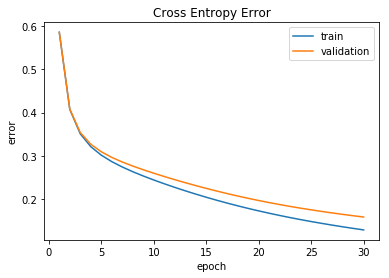

In [35]:
plt.plot(np.arange(1, len(np.mean(snn.evals_['cost'],axis=1)) + 1, 1), np.mean(snn.evals_['cost'],axis=1), label='train')
plt.plot(np.arange(1, len(np.mean(snn.evals_['cost_val'],axis=1)) + 1, 1), np.mean(snn.evals_['cost_val'],axis=1), label='validation')

plt.title('Cross Entropy Error')
plt.xlabel('epoch')
plt.ylabel('error')

plt.legend()
plt.show


## 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

<function matplotlib.pyplot.show(*args, **kw)>

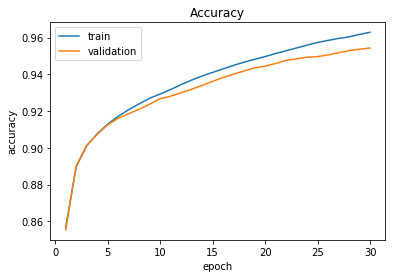

In [36]:
plt.plot(np.arange(1, len(snn.evals_['train_acc']) + 1, 1), snn.evals_['train_acc'], label='train')
plt.plot(np.arange(1, len(snn.evals_['valid_acc']) + 1, 1), snn.evals_['valid_acc'], label='validation')

plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()
plt.show


In [37]:
y_pred = snn.predict(X_val)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1147
           1       0.97      0.99      0.98      1356
           2       0.95      0.96      0.96      1217
           3       0.96      0.92      0.94      1258
           4       0.94      0.95      0.95      1171
           5       0.93      0.95      0.94      1022
           6       0.97      0.97      0.97      1171
           7       0.97      0.96      0.97      1257
           8       0.93      0.95      0.94      1170
           9       0.94      0.92      0.93      1231

   micro avg       0.95      0.95      0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000



### （オプション）誤分類の確認
誤分類した画像はどのようなものだったかを見てみましょう。推定値を用意し、以下のコードを実行してください。

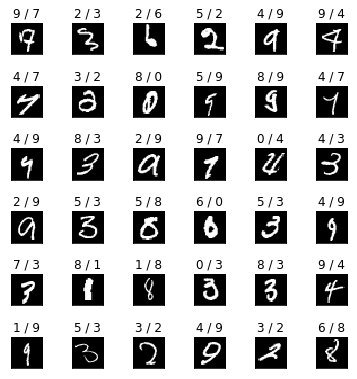

In [39]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # いくつ表示するか

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

### pyファイルで動作確認

In [40]:
#pyファイル格納ディレクトリのパス設定
import sys
sys.path.append("/Users/yusuke-saruya/diveintocode-ml/full-time/diveintocode-term2/ml-scratch/utils/")
import neuralnetrowk

In [41]:
snn2 = neuralnetrowk.ScratchSimpleNeuralNetrowkClassifier(
    verbose = True, 
    n_hidden1=400, 
    n_hidden2=200, 
    epochs=5, 
    eta=1e-3, 
    minibatch_size=10, 
    seed=None)

snn2.fit(X=X_train, y=y_train, X_val=X_val, y_val=y_val)

Cross Entropy Error
epoch1 : 0.5789620534154354
epoch_val1 : 0.578058426017997
epoch2 : 0.4048901759056104
epoch_val2 : 0.4044111885999692
epoch3 : 0.35054263495907095
epoch_val3 : 0.352135971096642
epoch4 : 0.32224735436071933
epoch_val4 : 0.3261827431735749
epoch5 : 0.3035232011149711
epoch_val5 : 0.30961392048693753
